In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
combined_attacks_df = pd.read_csv("Resources/combined_attacks.csv")
combined_attacks_df.head()

,case_number,date,year,attack_type,country,area,location,activity,name,sex,...,original_order,unnamed_22,unnamed_23,animal_type,count,latitude,longitude,details,month,day
0,2019.08.27,2019-08-27,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6452.0,NaN,NaN,shark,174.0,29.025813,-80.927127,NaN,NaN,NaN
1,2019.08.21,2019-08-21,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,6451.0,NaN,NaN,shark,6.0,26.122308,-80.143379,NaN,NaN,NaN
2,2019.08.20,2019-08-20,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,6450.0,NaN,NaN,shark,1.0,41.635587,-82.837600,NaN,NaN,NaN
3,2019.08.16,2019-08-16,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,6449.0,NaN,NaN,shark,174.0,29.025813,-80.927127,NaN,NaN,NaN
4,2019.08.11,2019-08-11,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,6448.0,NaN,NaN,shark,1.0,21.476965,-158.220908,NaN,NaN,NaN


### Analysis and Visualizations

c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\carlo\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

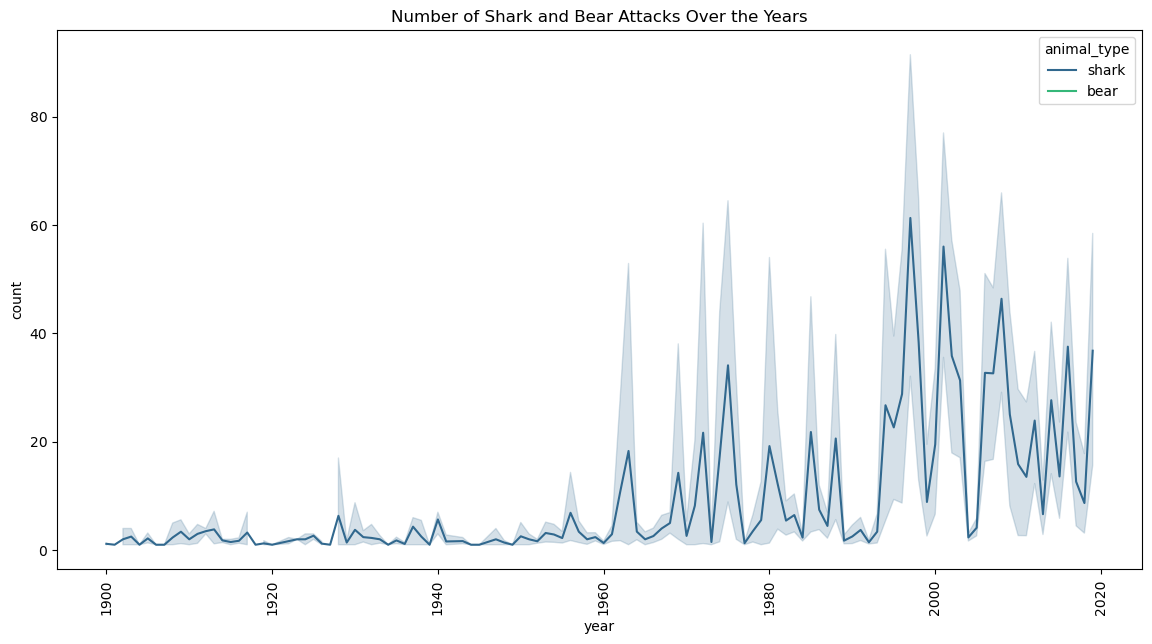

In [12]:
# Comparison of attacks over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_attacks_df, x='year', y='count', hue='animal_type', palette='viridis')
plt.title('Number of Shark and Bear Attacks Over the Years')
plt.xticks(rotation=90)
plt.show()

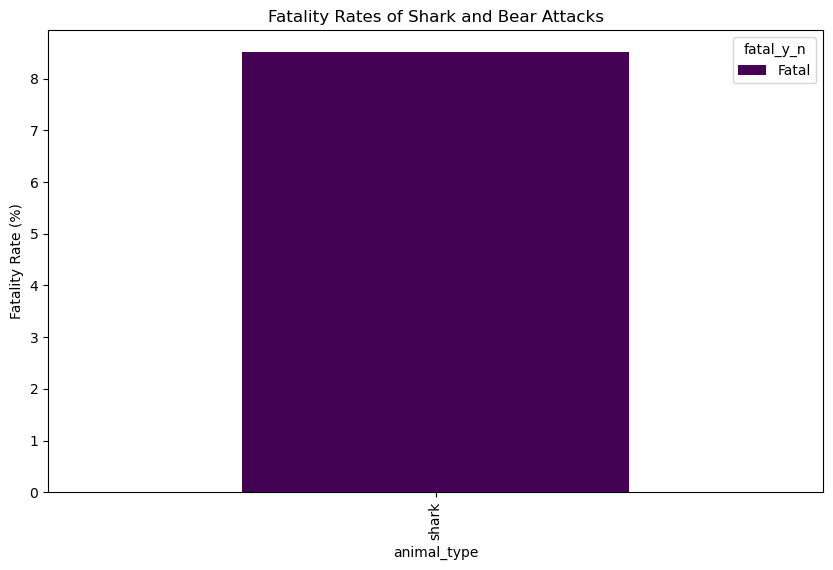

In [5]:
# Comparison of fatality rates
fatality_rates = combined_attacks_df.groupby(['animal_type', 'fatal_y_n']).size().unstack().fillna(0)
fatality_rates['Fatal'] = fatality_rates['Y'] / (fatality_rates['Y'] + fatality_rates['N']) * 100
fatality_rates[['Fatal']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Fatality Rates of Shark and Bear Attacks')
plt.ylabel('Fatality Rate (%)')
plt.show()

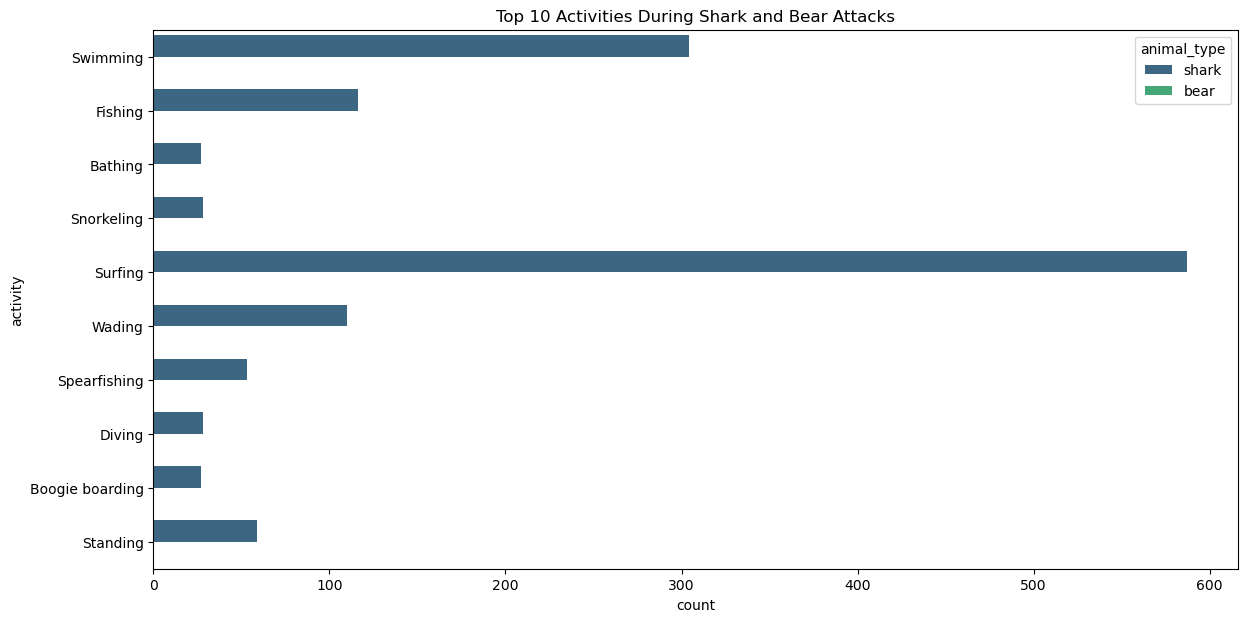

In [11]:
# Activities during attacks
plt.figure(figsize=(14, 7))
top_activities_sharks = combined_attacks_df[combined_attacks_df['animal_type'] == 'shark']['activity'].value_counts().head(10).index
top_activities_bears = combined_attacks_df[combined_attacks_df['animal_type'] == 'bear']['activity'].value_counts().head(10).index
top_activities = list(set(top_activities_sharks) | set(top_activities_bears))
sns.countplot(data=combined_attacks_df, y='activity', hue='animal_type', order=top_activities[::-1], palette='viridis')
plt.title('Top 10 Activities During Shark and Bear Attacks')
plt.show()

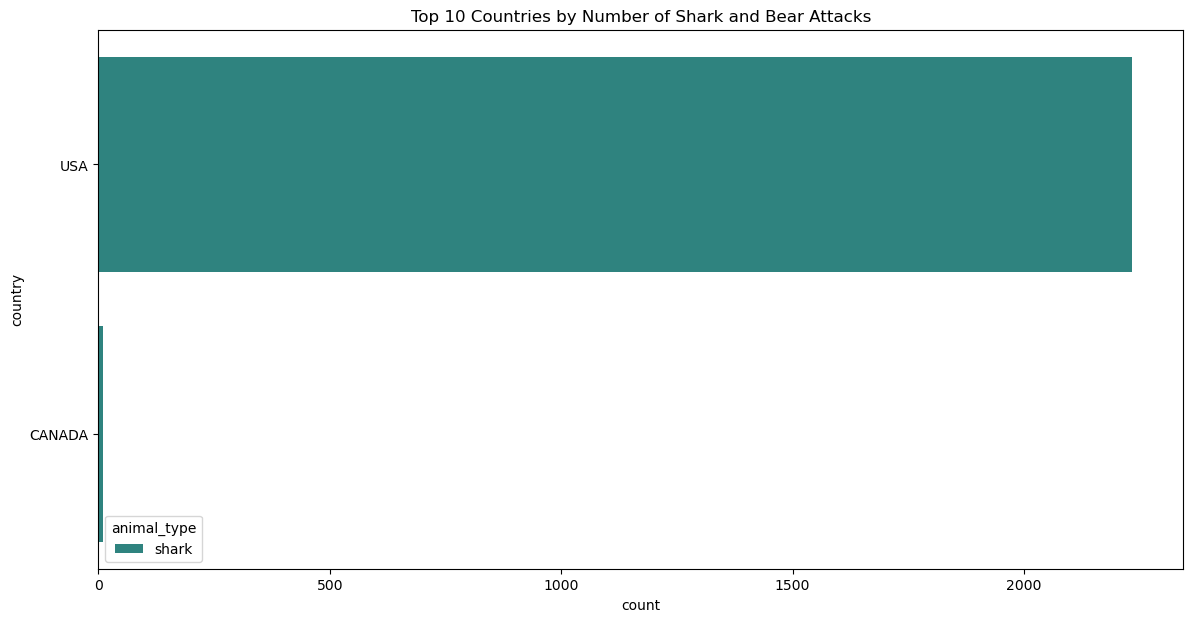

In [8]:
# Distribution of attacks by country
plt.figure(figsize=(14, 7))
top_countries = combined_attacks_df['country'].value_counts().head(10).index
sns.countplot(data=combined_attacks_df[combined_attacks_df['country'].isin(top_countries)], y='country', hue='animal_type', palette='viridis')
plt.title('Top 10 Countries by Number of Shark and Bear Attacks')
plt.show()